In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-5min/submission_baseline (2).csv


In [52]:
data = pd.read_csv("/kaggle/input/bitcoin-5min/submission_baseline (2).csv")

In [53]:
data_copy = data.copy()

In [54]:
data_copy.head()

,date,open,high,low,close,volume,adl,middle_band,upper_band,lower_band,...,vhf,vch,vosc,vrc,wc,ws,wad,wr,price_change,close_target
0,2015-10-08 13:45:00,242.96,243.0,242.96,243.0,0.104000,0.104000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,242.990,NaN,NaN,NaN,NaN,245.0
1,2015-10-08 13:50:00,243.00,245.0,243.00,245.0,0.408163,0.512163,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,244.500,NaN,2.0,NaN,0.008230,245.0
2,2015-10-08 13:55:00,245.00,245.0,245.00,245.0,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,245.000,NaN,0.0,NaN,0.000000,244.5
3,2015-10-08 14:00:00,245.00,245.0,244.50,244.5,0.987223,-0.475059,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,244.625,NaN,-0.5,NaN,-0.002041,244.5
4,2015-10-08 14:05:00,244.50,244.5,244.50,244.5,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,0.1937,NaN,244.500,244.4,0.0,-24.5098,0.000000,244.5


In [55]:
data_copy.shape

(775425, 80)

In [56]:
pd.set_option('display.max_rows', None)

# Теперь вывод будет полным
issues = data_copy[data_copy.columns[data_copy.isna().sum() > 0]]
print(issues.isna().sum())

# Чтобы вернуть настройки обратно
pd.reset_option('display.max_rows')

adl             115162
middle_band         19
upper_band          19
lower_band          19
cmf             206885
co                  25
cmo              52652
cci              49564
dpo                  4
+di                 14
-di                 14
dx                  14
adx                 27
adxr                40
dema                 8
emv              85002
emv_ma          239901
fosc                14
senkou_a            26
senkou_b            26
imi              20371
ko                  67
lri                 13
lrs                 13
mfi              85001
mi                  40
mom                 12
ma-simple           19
macd                25
signal_line         33
highest_high         5
lowest_low           5
posc                29
prc                 25
qstick               7
ri                   7
rmi                 11
rsi                 14
rvi                 13
sd                  19
smi                  8
%K               19042
%D               22088
swi        

In [57]:
#Using median if we have less than 100 NaN
less_100_median = issues.columns[issues.isna().sum() <= 100]
print(less_100_median)

Index(['middle_band', 'upper_band', 'lower_band', 'co', 'dpo', '+di', '-di',
       'dx', 'adx', 'adxr', 'dema', 'fosc', 'senkou_a', 'senkou_b', 'ko',
       'lri', 'lrs', 'mi', 'mom', 'ma-simple', 'macd', 'signal_line',
       'highest_high', 'lowest_low', 'posc', 'prc', 'qstick', 'ri', 'rmi',
       'rsi', 'rvi', 'sd', 'smi', 'tsf', 'tema', 'vch', 'vosc', 'ws', 'wad',
       'price_change'],
      dtype='object')


In [58]:
data_copy[less_100_median] = data_copy[less_100_median].fillna("median")

In [61]:
data_copy.isna().sum().sort_values(ascending=False)

emv_ma          239901
cmf             206885
adl             115162
swi              86802
emv              85002
                 ...  
fosc                 0
rl_100.0             0
rl_61.8              0
rl_50.0              0
close_target         0
Length: 80, dtype: int64

In [62]:
too_much_nan = issues.columns[issues.isna().sum() >= 100000]
print(too_much_nan)

Index(['adl', 'cmf', 'emv_ma'], dtype='object')


In [63]:
data_copy = data_copy.drop(too_much_nan, axis=1)

In [64]:
data_copy.isna().sum().sort_values(ascending=False)

swi             86802
emv             85002
mfi             85001
vrc             78548
vhf             52652
                ...  
fosc                0
rl_100.0            0
rl_61.8             0
rl_50.0             0
close_target        0
Length: 77, dtype: int64

In [69]:
interpolate_nan = data_copy[data_copy.columns[data_copy.isna().sum() > 0]].columns
interpolate_nan

Index(['cmo', 'cci', 'emv', 'imi', 'mfi', '%K', '%D', 'swi', 'uosc', 'vhf',
       'vrc', 'wr'],
      dtype='object')

In [65]:
data_copy2 = data_copy.copy()

In [70]:
data_copy2[interpolate_nan] = data_copy2[interpolate_nan].interpolate(method="linear")

In [87]:
data_copy2 = data_copy2.dropna()

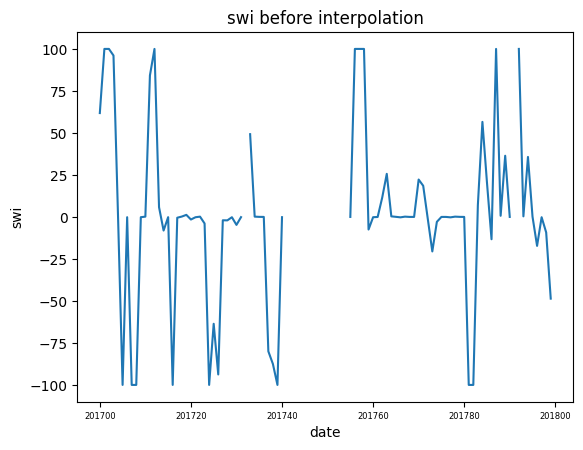

In [107]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
data = data_copy.loc["2017-01-01":"2018-01-01"]
ax.plot(data.index, data["swi"])


plt.title("swi before interpolation")
plt.xlabel("date")
plt.ylabel("swi")
plt.savefig("coef_nan.jpg", dpi=400)
plt.show()

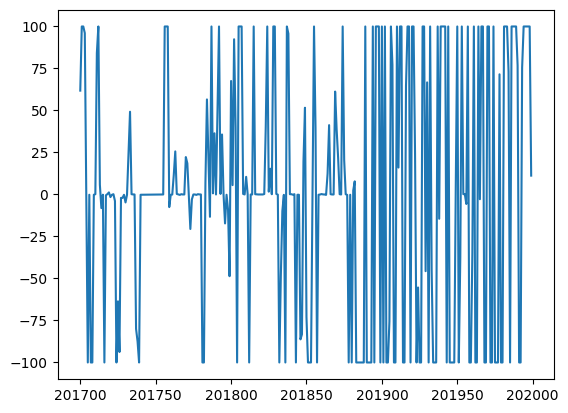

In [99]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
data = data_copy2.loc["2017-01-01":"2018-01-01"]
ax.plot(data.index, data["swi"])
plt.title("swi after interpolation")
plt.xlabel("date")
plt.ylabel("swi")
plt.savefig("coef_lin_inter.jpg", dpi=400)
plt.show()

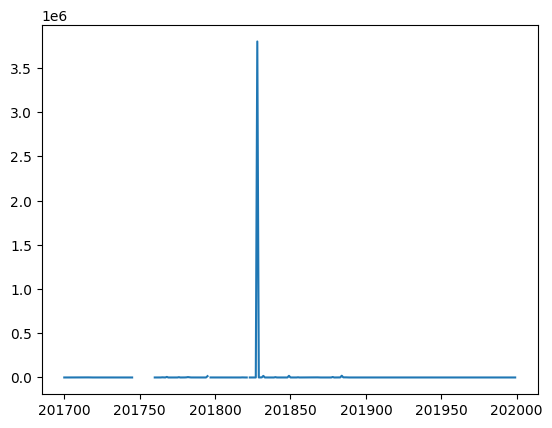

In [100]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
data = data_copy2.loc["2017-01-01":"2020-01-01"]
ax.plot(data.index, data["vrc"])
plt.title("Issue with vrc before interpolation")
plt.xlabel("date")
plt.ylabel("vrc")
plt.savefig("coef_issues", dpi=400)
plt.show()

In [89]:
data_copy2.shape

(775396, 77)

In [88]:
pd.set_option('display.max_rows', None)

print(data_copy2.isna().sum())

pd.reset_option('display.max_rows')

date            0
open            0
high            0
low             0
close           0
volume          0
middle_band     0
upper_band      0
lower_band      0
co              0
cmo             0
cci             0
dpo             0
+di             0
-di             0
dx              0
adx             0
adxr            0
dema            0
emv             0
rl_0.0          0
rl_23.6         0
rl_38.2         0
rl_50.0         0
rl_61.8         0
rl_100.0        0
fosc            0
tenkan_sen      0
kijun_sen       0
senkou_a        0
senkou_b        0
imi             0
ko              0
lri             0
lrs             0
mfi             0
mi              0
mp              0
mom             0
ma-simple       0
macd            0
signal_line     0
nvi             0
obv             0
sar             0
prf             0
target_LONG     0
pvi             0
pvt             0
highest_high    0
lowest_low      0
posc            0
prc             0
qstick          0
ri              0
rmi       

In [31]:
data_copy.isna().sum()

date                0
open                0
high                0
low                 0
close               0
volume              0
middle_band         0
upper_band          0
lower_band          0
co                  0
cmo             52652
cci             49564
dpo                 0
+di                 0
-di                 0
dx                  0
adx                 0
adxr                0
dema                0
emv             85002
rl_0.0              0
rl_23.6             0
rl_38.2             0
rl_50.0             0
rl_61.8             0
rl_100.0            0
fosc                0
tenkan_sen          0
kijun_sen           0
senkou_a            0
senkou_b            0
imi             20371
ko                  0
lri                 0
lrs                 0
mfi             85001
mi                  0
mp                  0
mom                 0
ma-simple           0
macd                0
signal_line         0
nvi                 0
obv                 0
sar                 0
prf       

In [101]:
data_copy2.to_csv("bitcoin_data_5min.csv", index=True)

KeyboardInterrupt: 